PID Controller Notebook

Tutor:
* Google Gemini

## PID Controller: A Brief Overview

A PID controller, or Proportional-Integral-Derivative controller, is a type of feedback controller commonly used in control systems to regulate a process variable to a desired setpoint. It uses a combination of three control actions:

* **Proportional (P):** This action takes the error (difference between the desired setpoint and the actual process variable) and applies a control signal proportional to it.
* **Integral (I):** This action integrates the error over time. This helps to eliminate steady-state errors by gradually adjusting the control signal to counteract any persistent offset.
* **Derivative (D):** This action predicts the future error by measuring the rate of change of the error. It helps to speed up the response time and reduce overshoot.

**Equation:**

The control signal (u) from a PID controller is calculated using the following equation:

```
u(t) = Kp * e(t) + Ki * ∫ e(t) dt + Kd * de(t)/dt
```

where:

* `u(t)` is the control signal at time t
* `Kp` is the proportional gain
* `Ki` is the integral gain
* `Kd` is the derivative gain
* `e(t)` is the error at time t
* `∫ e(t) dt` is the integral of the error over time
* `de(t)/dt` is the derivative of the error with respect to time

**Glossary:**

| Symbol | Term | Description |
|---|---|---|
| `u(t)` | Control Signal | The output of the controller that is applied to the process. |
| `Kp` | Proportional Gain | Determines the magnitude of the control signal in response to the error. |
| `Ki` | Integral Gain | Determines the rate at which the controller eliminates steady-state errors. |
| `Kd` | Derivative Gain | Determines the speed of the controller's response and helps to reduce overshoot. |
| `e(t)` | Error | The difference between the desired setpoint and the actual process variable. |
| `∫ e(t) dt` | Integral of the Error | The accumulated error over time. |
| `de(t)/dt` | Derivative of the Error | The rate of change of the error with respect to time. |

By carefully tuning the `Kp`, `Ki`, and `Kd` gains, PID controllers can achieve precise control of a wide range of processes in various industries.


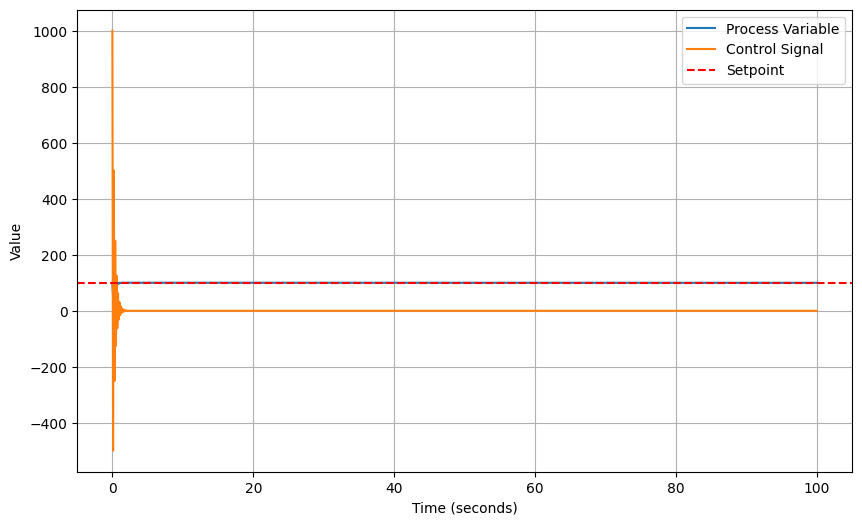

In [1]:
# Abstract:
# This Python script demonstrates a PID controller implementation for a hypothetical process.
# It simulates the controller's response to a setpoint change and plots the process variable and
# control signal over time. The PID gains (Kp, Ki, Kd) can be adjusted to tune the controller's performance.

import matplotlib.pyplot as plt
import numpy as np

def pid_controller(setpoint, process_variable, Kp, Ki, Kd, dt):
    """
    Implements a PID controller.

    Args:
        setpoint (float): The desired value for the process variable.
        process_variable (float): The current value of the process variable.
        Kp (float): The proportional gain.
        Ki (float): The integral gain.
        Kd (float): The derivative gain.
        dt (float): The time step.

    Returns:
        float: The control signal.
    """

    global integral_error, previous_error

    error = setpoint - process_variable
    integral_error += error * dt
    derivative_error = (error - previous_error) / dt
    previous_error = error

    control_signal = Kp * error + Ki * integral_error + Kd * derivative_error
    return control_signal

# Simulation parameters
setpoint = 100.0
Kp = 5.0
Ki = 0.1
Kd = 0.5
dt = 0.1
simulation_time = 100

# Initialize variables
process_variable = 0.0
integral_error = 0.0
previous_error = 0.0

# Simulation loop
time_steps = int(simulation_time / dt)
time_values = np.linspace(0, simulation_time, time_steps)
process_values = []
control_signals = []

for _ in range(time_steps):
    control_signal = pid_controller(setpoint, process_variable, Kp, Ki, Kd, dt)
    # Simulate the process (replace with your actual process model)
    process_variable += control_signal * dt
    process_values.append(process_variable)
    control_signals.append(control_signal)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time_values, process_values, label="Process Variable")
plt.plot(time_values, control_signals, label="Control Signal")
plt.axhline(setpoint, color='red', linestyle='--', label="Setpoint")
plt.xlabel("Time (seconds)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

